# Fraud Detection Overview

Fraud detection is one of the most important applications in data science, as the ability to detect fraud helps establish consumer trust and corporate integrity. Not to mention, eliminating fraud would prevent millions, if not billions, of dollars worth of loss and damages.

Depending on the data, running classification algorithms like logistic regression and SVM to detect fraud is relatively uncomplicated. There are the usual steps of collecting the data, cleaning it, and then running it through multiple models to obtain the best metric. To save time, automated machine learning programs can iterate through many machine learning and deep learning models to find the one that provides the best performance. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('creditcard.csv')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


There are over 280000 entries of data and going through all of that would be very computationally expensive, so lets just take a small sample as the train and test set. 

In [ ]:
#Save the first 50000 entries as training data
df[0:50000].to_csv('train.csv')

In [3]:
train = pd.read_csv('train.csv')
train.shape

(50000, 32)

In [ ]:
#save the next 10000 as test data
df[50000:60000].to_csv('test.csv')


In [4]:
test = pd.read_csv('test.csv')
print(test.shape)

(10000, 32)


## Quick Glance w/ info(), isna()sum(), and describe()

In [5]:
#provides overview of data types to see if any categorical data needs to be encoded; none here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#overview if any null values are present; none here
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#a good way to find placeholder nulls in numerical data. Usually this means looking at the min/max of each feature for any
#extremes; data doesn't seem to contain placeholder nulls or outliers
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<BarContainer object of 2 artists>

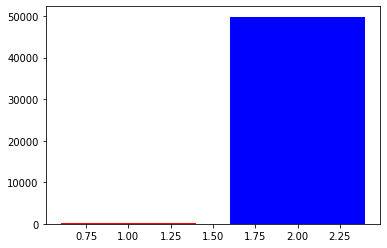

In [8]:
import matplotlib.pyplot as plt

no_fraud = train[train['Class']==0].shape[0]
fraud = train[train['Class']==1].shape[0]

plt.bar(x=[1,2], height = [fraud, no_fraud], color = ['red', 'blue'])

There's a great imbalance between fraudulent and non-fraudulent cases, which will affect our algorithms. Therefore, it's necessary to balance these classes. 

## Balancing Classes with SMOTE

In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = train.loc[:, train.columns != 'Class']
y = train['Class']

os = SMOTE(random_state=117)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=117)

columns = X_train.columns

os_data_X, os_data_y=os.fit_sample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Class'])

In [27]:
# Check the numbers
print("length of oversampled data is ",len(os_data_X))
print("Number of not fraud in oversampled data",len(os_data_y[os_data_y['Class']==0]))
print("Number of fraud",len(os_data_y[os_data_y['Class']==1]))
print("Proportion of not fraud in oversampled data is ",len(os_data_y[os_data_y['Class']==0])/len(os_data_X))
print("Proportion of fraud data in oversampled data is ",len(os_data_y[os_data_y['Class']==1])/len(os_data_X))

length of oversampled data is  79758
Number of not fraud in oversampled data 39879
Number of fraud 39879
Proportion of not fraud in oversampled data is  0.5
Proportion of fraud data in oversampled data is  0.5


In [28]:
os_train = os_data_X
os_train['Class'] = os_data_y.values
os_train.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,23573,32828.0,0.601467,-0.972097,-0.836823,0.285860,-0.246023,-0.971890,1.018488,-0.529431,...,0.168925,-0.323254,-0.505600,0.017159,0.509378,1.056221,-0.181210,0.056364,399.00,0
1,46656,42873.0,-0.992590,-0.329359,2.326593,-0.695860,0.032342,0.340383,0.056838,0.196443,...,-0.141609,-0.103302,-0.134270,-0.417595,0.304661,-0.375699,-0.108228,-0.153287,65.00,0
2,6358,7577.0,-0.318075,1.062283,1.759506,1.003932,0.426871,0.449983,0.604184,-0.124242,...,-0.199046,-0.065634,-0.163249,-0.574275,-0.229511,-0.414992,0.214577,-0.031305,36.00,0
3,13801,24468.0,-9.970943,-4.156007,0.059100,2.745572,2.812815,-1.567950,1.336645,-2.428785,...,-3.340266,1.091950,3.545291,0.601934,1.824614,0.045613,2.200767,-1.341030,18.14,0
4,15669,27089.0,-0.413949,1.112684,1.586218,-0.041054,0.026548,-0.881305,0.757186,-0.118384,...,-0.217986,-0.518803,-0.036909,0.386680,-0.162144,0.068418,0.271848,0.122978,0.89,0


<BarContainer object of 2 artists>

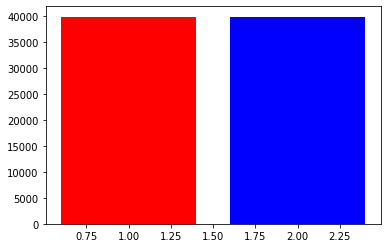

In [29]:
no_fraud = os_train[os_train['Class']==0].shape[0]
fraud = os_train[os_train['Class']==1].shape[0]

plt.bar(x=[1,2], height = [fraud, no_fraud], color = ['red', 'blue'])

In [24]:
import h2o
from h2o.automl import H2OAutoML

def run_h2o(df,target,model_number):
    
    """
    Function initiates an h2o cluster, converts
    the dataframe to an h2o dataframe, and then runs
    the autoML function to generate a list of optimal 
    predictor models, which are displayed on a scoreboard
    
    Arguments:
        dataframe: Pandas dataframe. 
        target: String. Name of the predicted target
        model_number: Int. Total number of models to run.
        
    Outputs:
        prints Leader board of best performing models in the console
        returns aml model
    """
    
    h2o.init()

    dataframe = h2o.H2OFrame(df)
    
    dataframe[target] = dataframe[target].asfactor()
    
    #Declare the x- and y- variables for the database. 
    #x-variables are predictor variables, and y-variable is what
    #we wish to predict
    x = dataframe.columns
    y = target
    
    x.remove(y)

    #Pull the training and test data out at a 80/20 split.
    train, test, val = dataframe.split_frame(ratios=[.8, .1])
    
    # Run AutoML for 20 base models (limited to 1 hour max runtime by default)
    aml = H2OAutoML(max_models=model_number,  sort_metric = 'AUC', seed=117)
    aml.train(x=x, y=y, training_frame=train, validation_frame = val)

    # View the AutoML Leaderboard
    lb = aml.leaderboard
    print(lb.head(rows=lb.nrows))
    
    return aml

In [25]:
h2o_aml = run_h2o(os_train, 'Class', 10)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.7+8-LTS, mixed mode)
  Starting server from C:\Users\Thien_Nguyen\anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\THIEN_~1\AppData\Local\Temp\tmp6rqujtrd
  JVM stdout: C:\Users\THIEN_~1\AppData\Local\Temp\tmp6rqujtrd\h2o_Thien_Nguyen_started_from_python.out
  JVM stderr: C:\Users\THIEN_~1\AppData\Local\Temp\tmp6rqujtrd\h2o_Thien_Nguyen_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.2
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_Thien_Nguyen_h398vw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.973 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |
11:45:12.602: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
11:45:12.629: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_5_AutoML_20200508_114512,0.999995,0.00136292,0.999995,0.000172456,0.0141065,0.000198992
GBM_grid__1_AutoML_20200508_114512_model_1,0.999989,0.00155946,0.999988,0.000156828,0.0136831,0.000187227
GBM_2_AutoML_20200508_114512,0.999986,0.00158271,0.999985,0.000172456,0.0140643,0.000197805
GBM_3_AutoML_20200508_114512,0.999984,0.00155882,0.999983,0.000172511,0.0135931,0.000184772
XRT_1_AutoML_20200508_114512,0.999982,0.0024018,0.999966,0.000156773,0.0156664,0.000245436
GBM_4_AutoML_20200508_114512,0.99998,0.00160733,0.999978,0.000156828,0.0136962,0.000187587
StackedEnsemble_BestOfFamily_AutoML_20200508_114512,0.999952,0.00172269,0.99994,0.000188194,0.0144414,0.000208554
GBM_1_AutoML_20200508_114512,0.999949,0.0019535,0.999958,0.000203766,0.0151342,0.000229044
DRF_1_AutoML_20200508_114512,0.999935,0.00392131,0.999872,0.0001724,0.0162292,0.000263387
StackedEnsemble_AllModels_AutoML_20200508_114512,0.999932,0.00160606,0.999904,0.000172511,0.0137926,0.000190236


In [26]:
h2o_aml.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_5_AutoML_20200508_114512


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,130.0,130.0,193879.0,11.0,15.0,14.969231,35.0,182.0,113.64616




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 7.486371785149324e-08
RMSE: 0.0002736123495960905
LogLoss: 1.1355000208297566e-05
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9954440225289588: 


,,0,1,Error,Rate
0,0,31882.0,0.0,0.0,(0.0/31882.0)
1,1,0.0,31995.0,0.0,(0.0/31995.0)
2,Total,31882.0,31995.0,0.0,(0.0/63877.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.995444,1.000000,198.0
1,max f2,0.995444,1.000000,198.0
2,max f0point5,0.995444,1.000000,198.0
3,max accuracy,0.995444,1.000000,198.0
4,max precision,0.999999,1.000000,0.0
5,max recall,0.995444,1.000000,198.0
6,max specificity,0.999999,1.000000,0.0
7,max absolute_mcc,0.995444,1.000000,198.0
8,max min_per_class_accuracy,0.995444,1.000000,198.0
9,max mean_per_class_accuracy,0.995444,1.000000,198.0



Gains/Lift Table: Avg response rate: 50.09 %, avg score: 50.09 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011006,9.999989e-01,1.996468,1.996468,1.000000,0.999999,1.000000,0.999999,0.021972,0.021972,99.646820,99.646820
1,,2,0.020054,9.999989e-01,1.996468,1.996468,1.000000,0.999999,1.000000,0.999999,0.018065,0.040038,99.646820,99.646820
2,,3,0.030465,9.999988e-01,1.996468,1.996468,1.000000,0.999999,1.000000,0.999999,0.020784,0.060822,99.646820,99.646820
3,,4,0.040343,9.999988e-01,1.996468,1.996468,1.000000,0.999999,1.000000,0.999999,0.019722,0.080544,99.646820,99.646820
4,,5,0.050002,9.999988e-01,1.996468,1.996468,1.000000,0.999999,1.000000,0.999999,0.019284,0.099828,99.646820,99.646820
5,,6,0.100099,9.999988e-01,1.996468,1.996468,1.000000,0.999999,1.000000,0.999999,0.100016,0.199844,99.646820,99.646820
6,,7,0.150665,9.999987e-01,1.996468,1.996468,1.000000,0.999999,1.000000,0.999999,0.100953,0.300797,99.646820,99.646820
7,,8,0.200025,9.999986e-01,1.996468,1.996468,1.000000,0.999999,1.000000,0.999999,0.098547,0.399344,99.646820,99.646820
8,,9,0.299998,9.999982e-01,1.996468,1.996468,1.000000,0.999998,1.000000,0.999999,0.199594,0.598937,99.646820,99.646820
9,,10,0.400003,9.999962e-01,1.996468,1.996468,1.000000,0.999998,1.000000,0.999998,0.199656,0.798594,99.646820,99.646820




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.0002496443076210829
RMSE: 0.015800136316534832
LogLoss: 0.0017386875090537309
Mean Per-Class Error: 0.0002494387627837158
AUC: 0.9999995620588564
AUCPR: 0.9999995596501666
Gini: 0.9999991241177129

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9905512428407901: 


,,0,1,Error,Rate
0,0,4007.0,2.0,0.0005,(2.0/4009.0)
1,1,0.0,3987.0,0.0,(0.0/3987.0)
2,Total,4007.0,3989.0,0.0003,(2.0/7996.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,9.905512e-01,0.999749,227.0
1,max f2,9.905512e-01,0.999900,227.0
2,max f0point5,9.993156e-01,0.999799,221.0
3,max accuracy,9.905512e-01,0.999750,227.0
4,max precision,9.999989e-01,1.000000,0.0
5,max recall,9.905512e-01,1.000000,227.0
6,max specificity,9.999989e-01,1.000000,0.0
7,max absolute_mcc,9.905512e-01,0.999500,227.0
8,max min_per_class_accuracy,9.967366e-01,0.999501,226.0
9,max mean_per_class_accuracy,9.905512e-01,0.999751,227.0



Gains/Lift Table: Avg response rate: 49.86 %, avg score: 49.89 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010380,9.999989e-01,2.005518,2.005518,1.000000,0.999999,1.000000,0.999999,0.020818,0.020818,100.551793,100.551793
1,,2,0.020010,9.999989e-01,2.005518,2.005518,1.000000,0.999999,1.000000,0.999999,0.019313,0.040130,100.551793,100.551793
2,,3,0.030015,9.999988e-01,2.005518,2.005518,1.000000,0.999999,1.000000,0.999999,0.020065,0.060196,100.551793,100.551793
3,,4,0.040020,9.999988e-01,2.005518,2.005518,1.000000,0.999999,1.000000,0.999999,0.020065,0.080261,100.551793,100.551793
4,,5,0.050025,9.999988e-01,2.005518,2.005518,1.000000,0.999999,1.000000,0.999999,0.020065,0.100326,100.551793,100.551793
5,,6,0.100175,9.999988e-01,2.005518,2.005518,1.000000,0.999999,1.000000,0.999999,0.100577,0.200903,100.551793,100.551793
6,,7,0.150200,9.999987e-01,2.005518,2.005518,1.000000,0.999999,1.000000,0.999999,0.100326,0.301229,100.551793,100.551793
7,,8,0.200100,9.999986e-01,2.005518,2.005518,1.000000,0.999999,1.000000,0.999999,0.100075,0.401304,100.551793,100.551793
8,,9,0.300025,9.999982e-01,2.005518,2.005518,1.000000,0.999998,1.000000,0.999999,0.200401,0.601706,100.551793,100.551793
9,,10,0.400075,9.999961e-01,2.005518,2.005518,1.000000,0.999998,1.000000,0.999998,0.200652,0.802358,100.551793,100.551793




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.0001989920559821847
RMSE: 0.014106454408609723
LogLoss: 0.0013629248506955055
Mean Per-Class Error: 0.00017245574616020498
AUC: 0.999994582695984
AUCPR: 0.9999945202716717
Gini: 0.9999891653919679

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.929401336427848: 


,,0,1,Error,Rate
0,0,31872.0,10.0,0.0003,(10.0/31882.0)
1,1,1.0,31994.0,0.0,(1.0/31995.0)
2,Total,31873.0,32004.0,0.0002,(11.0/63877.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,9.294013e-01,0.999828,188.0
1,max f2,7.756749e-01,0.999925,191.0
2,max f0point5,9.663753e-01,0.999756,185.0
3,max accuracy,9.294013e-01,0.999828,188.0
4,max precision,9.999999e-01,1.000000,0.0
5,max recall,7.756749e-01,1.000000,191.0
6,max specificity,9.999999e-01,1.000000,0.0
7,max absolute_mcc,9.294013e-01,0.999656,188.0
8,max min_per_class_accuracy,9.909534e-01,0.999718,179.0
9,max mean_per_class_accuracy,9.294013e-01,0.999828,188.0



Gains/Lift Table: Avg response rate: 50.09 %, avg score: 50.11 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010270,1.000000e+00,1.996468,1.996468,1.000000,1.000000e+00,1.000000,1.000000,0.020503,0.020503,99.646820,99.646820
1,,2,0.020367,1.000000e+00,1.996468,1.996468,1.000000,1.000000e+00,1.000000,1.000000,0.020159,0.040663,99.646820,99.646820
2,,3,0.030011,1.000000e+00,1.996468,1.996468,1.000000,1.000000e+00,1.000000,1.000000,0.019253,0.059916,99.646820,99.646820
3,,4,0.040014,9.999999e-01,1.996468,1.996468,1.000000,1.000000e+00,1.000000,1.000000,0.019972,0.079887,99.646820,99.646820
4,,5,0.050002,9.999999e-01,1.996468,1.996468,1.000000,9.999999e-01,1.000000,1.000000,0.019941,0.099828,99.646820,99.646820
5,,6,0.100020,9.999996e-01,1.996468,1.996468,1.000000,9.999998e-01,1.000000,1.000000,0.099859,0.199687,99.646820,99.646820
6,,7,0.150007,9.999992e-01,1.996468,1.996468,1.000000,9.999994e-01,1.000000,1.000000,0.099797,0.299484,99.646820,99.646820
7,,8,0.200041,9.999981e-01,1.996468,1.996468,1.000000,9.999985e-01,1.000000,0.999999,0.099891,0.399375,99.646820,99.646820
8,,9,0.299998,9.999968e-01,1.996468,1.996468,1.000000,9.999976e-01,1.000000,0.999999,0.199562,0.598937,99.646820,99.646820
9,,10,0.400003,9.999638e-01,1.996468,1.996468,1.000000,9.999861e-01,1.000000,0.999996,0.199656,0.798594,99.646820,99.646820




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.9998434,2.6545368E-4,0.99992174,1.0,0.99992174,0.9993738,1.0
1,auc,0.9999863,2.5765836E-5,0.9999979,1.0,0.9999931,0.9999405,1.0
2,aucpr,0.9999858,2.6725114E-5,0.9999979,1.0,0.99999297,0.9999383,1.0
3,err,1.5655455E-4,2.6545368E-4,7.827176E-5,0.0,7.827789E-5,6.262231E-4,0.0
4,err_count,2.0,3.391165,1.0,0.0,1.0,8.0,0.0
5,f0point5,0.9997501,4.2365876E-4,0.99987495,1.0,0.999875,0.99900055,1.0
6,f1,0.9998438,2.6488976E-4,0.99992186,1.0,0.9999219,0.9993751,1.0
7,f2,0.9999375,1.0599716E-4,0.9999687,1.0,0.99996877,0.99974996,1.0
8,lift_top_group,1.9964684,7.5316394E-4,1.9974984,1.9959382,1.9957819,1.9970299,1.9960938
9,logloss,0.001362953,0.001967729,6.8847503E-4,2.4284031E-4,8.3006255E-4,0.0048489445,2.0444233E-4



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-05-08 11:49:50,51.718 sec,0.0,0.499999,0.693146,0.500000,0.500885,1.000000,0.499115,0.500003,0.693154,0.500000,0.498624,1.000000,0.501376
1,,2020-05-08 11:49:50,51.970 sec,5.0,0.302365,0.359586,0.999936,0.999936,1.996468,0.002740,0.302931,0.360350,0.999885,0.999882,2.005518,0.002626
2,,2020-05-08 11:49:51,52.273 sec,10.0,0.186652,0.204644,0.999957,0.999957,1.996468,0.002176,0.187802,0.205764,0.999896,0.999890,2.005518,0.002376
3,,2020-05-08 11:49:51,52.595 sec,15.0,0.118166,0.121638,0.999972,0.999972,1.996468,0.001894,0.119335,0.122565,0.999939,0.999936,2.005518,0.001876
4,,2020-05-08 11:49:51,52.901 sec,20.0,0.077163,0.074009,0.999982,0.999982,1.996468,0.001362,0.078335,0.074832,0.999947,0.999944,2.005518,0.001251
5,,2020-05-08 11:49:52,53.213 sec,25.0,0.053086,0.046011,0.999987,0.999987,1.996468,0.000986,0.054479,0.046736,0.999965,0.999964,2.005518,0.001126
6,,2020-05-08 11:49:52,53.533 sec,30.0,0.038555,0.028970,0.999991,0.999991,1.996468,0.000704,0.040612,0.029774,0.999962,0.999960,2.005518,0.001001
7,,2020-05-08 11:49:52,53.866 sec,35.0,0.029291,0.018376,0.999994,0.999994,1.996468,0.000626,0.032235,0.019234,0.999955,0.999952,2.005518,0.000750
8,,2020-05-08 11:49:52,54.181 sec,40.0,0.023118,0.011760,0.999997,0.999997,1.996468,0.000391,0.026939,0.012648,0.999974,0.999973,2.005518,0.000625
9,,2020-05-08 11:49:53,54.511 sec,45.0,0.018893,0.007614,0.999999,0.999999,1.996468,0.000250,0.023502,0.008543,0.999980,0.999979,2.005518,0.000500



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,V14,69625.992188,1.000000,0.827799
1,V10,9516.745117,0.136684,0.113147
2,V12,1200.068848,0.017236,0.014268
3,V4,1140.653442,0.016383,0.013561
4,V17,683.324158,0.009814,0.008124
5,V3,419.222229,0.006021,0.004984
6,V21,303.095764,0.004353,0.003604
7,V7,156.984848,0.002255,0.001866
8,V13,154.558472,0.002220,0.001838
9,V11,143.162231,0.002056,0.001702



See the whole table with table.as_data_frame()


In [30]:
 #Get performance on test data
test_h2o = h2o.H2OFrame(test)
h2o_aml.leader.model_performance(test_data=test_h2o)

Parse progress: |█████████████████████████████████████████████████████████| 100%

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.0009269594429676449
RMSE: 0.030446008654134698
LogLoss: 0.009602142572899387
Mean Per-Class Error: 0.2023368385912201
AUC: 0.8728526122517108
AUCPR: 0.5363723726255794
Gini: 0.7457052245034217

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9998120131867952: 


,,0,1,Error,Rate
0,0,9985.0,0.0,0.0,(0.0/9985.0)
1,1,7.0,8.0,0.4667,(7.0/15.0)
2,Total,9992.0,8.0,0.0007,(7.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,9.998120e-01,0.695652,6.0
1,max f2,9.998120e-01,0.588235,6.0
2,max f0point5,9.998120e-01,0.851064,6.0
3,max accuracy,9.998120e-01,0.999300,6.0
4,max precision,9.999912e-01,1.000000,0.0
5,max recall,1.383241e-06,1.000000,387.0
6,max specificity,9.999912e-01,1.000000,0.0
7,max absolute_mcc,9.998120e-01,0.730041,6.0
8,max min_per_class_accuracy,2.036625e-06,0.755533,359.0
9,max mean_per_class_accuracy,1.726275e-06,0.797663,369.0



Gains/Lift Table: Avg response rate:  0.15 %, avg score:  0.11 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,9.536802e-05,53.333333,53.333333,0.080,0.110011,0.080000,0.110011,0.533333,0.533333,5233.333333,5233.333333
1,,2,0.02,3.834812e-05,0.000000,26.666667,0.000,0.000060,0.040000,0.055036,0.000000,0.533333,-100.000000,2566.666667
2,,3,0.03,2.160322e-05,0.000000,17.777778,0.000,0.000029,0.026667,0.036700,0.000000,0.533333,-100.000000,1677.777778
3,,4,0.04,1.483935e-05,0.000000,13.333333,0.000,0.000018,0.020000,0.027529,0.000000,0.533333,-100.000000,1233.333333
4,,5,0.05,1.190020e-05,0.000000,10.666667,0.000,0.000013,0.016000,0.022026,0.000000,0.533333,-100.000000,966.666667
5,,6,0.10,5.231960e-06,1.333333,6.000000,0.002,0.000008,0.009000,0.011017,0.066667,0.600000,33.333333,500.000000
6,,7,0.15,3.178770e-06,1.333333,4.444444,0.002,0.000004,0.006667,0.007346,0.066667,0.666667,33.333333,344.444444
7,,8,0.20,2.316420e-06,1.333333,3.666667,0.002,0.000003,0.005500,0.005510,0.066667,0.733333,33.333333,266.666667
8,,9,0.30,1.811762e-06,0.666667,2.666667,0.001,0.000002,0.004000,0.003674,0.066667,0.800000,-33.333333,166.666667
9,,10,0.40,1.622690e-06,1.333333,2.333333,0.002,0.000002,0.003500,0.002756,0.133333,0.933333,33.333333,133.333333


In [31]:
h2o.shutdown()

C:\Users\Thien_Nguyen\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  """Entry point for launching an IPython kernel.


H2O session _sid_bc62 closed.


In [37]:
def run_h2o(df,target,model_number):
    
    """
    Function initiates an h2o cluster, converts
    the dataframe to an h2o dataframe, and then runs
    the autoML function to generate a list of optimal 
    predictor models, which are displayed on a scoreboard
    
    Arguments:
        dataframe: Pandas dataframe. 
        target: String. Name of the predicted target
        model_number: Int. Total number of models to run.
        
    Outputs:
        prints Leader board of best performing models in the console
        returns aml model
    """
    
    h2o.init()

    dataframe = h2o.H2OFrame(df)
    
    dataframe[target] = dataframe[target].asfactor()
    
    #Declare the x- and y- variables for the database. 
    #x-variables are predictor variables, and y-variable is what
    #we wish to predict
    x = dataframe.columns
    y = target
    
    x.remove(y)

    #Pull the training and test data out at a 80/20 split.
    train, test, val = dataframe.split_frame(ratios=[.8, .1])
    
    # Run AutoML for 20 base models (limited to 1 hour max runtime by default)
    aml = H2OAutoML(max_models=model_number,  sort_metric = 'AUC', balance_classes =True, seed=117)
    aml.train(x=x, y=y, training_frame=train, validation_frame = val)

    # View the AutoML Leaderboard
    lb = aml.leaderboard
    print(lb.head(rows=lb.nrows))
    
    return aml

In [38]:
h2o_aml = run_h2o(train, 'Class', 10)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 min 01 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.2
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_Thien_Nguyen_ugp03h
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.951 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |
12:40:23.803: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
12:40:23.818: AutoML: XGBoost is not available; skipping it.

████Failed polling AutoML progress log: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\THIEN_~1\\AppData\\Local\\Temp\\tmpigf0hmro.csv'
████████████████████████████████████████████████████| 100%
Failed polling AutoML progress log: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\THIEN_~1\\AppData\\Local\\Temp\\tmpqjdy0390.csv'


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_2_AutoML_20200508_124023,0.990882,0.00502549,0.929712,0.042155,0.0242913,0.000590069
GBM_5_AutoML_20200508_124023,0.98579,0.00469941,0.935185,0.0463567,0.0247334,0.000611739
DeepLearning_1_AutoML_20200508_124023,0.984457,0.0130354,0.821359,0.0424064,0.0328326,0.00107798
GLM_1_AutoML_20200508_124023,0.984156,0.00494531,0.81944,0.105444,0.0332758,0.00110728
XRT_1_AutoML_20200508_124023,0.982903,0.0114451,0.936696,0.0547349,0.0436127,0.00190207
GBM_3_AutoML_20200508_124023,0.982519,0.00532337,0.927514,0.0463441,0.0255421,0.000652398
GBM_1_AutoML_20200508_124023,0.982376,0.00592825,0.9001,0.0547475,0.0276255,0.000763168
GBM_grid__1_AutoML_20200508_124023_model_1,0.982227,0.00595475,0.928979,0.0254363,0.0254606,0.000648243
GBM_4_AutoML_20200508_124023,0.979641,0.00543504,0.9278,0.0547601,0.0247267,0.000611411
DRF_1_AutoML_20200508_124023,0.978698,0.0116657,0.935993,0.0463567,0.0414728,0.00171999


In [39]:
test_h2o = h2o.H2OFrame(test)
h2o_aml.leader.model_performance(test_data=test_h2o)

Parse progress: |█████████████████████████████████████████████████████████| 100%

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.0010494841715493245
RMSE: 0.03239574310845986
LogLoss: 0.013361660610831433
Mean Per-Class Error: 0.20886329494241362
AUC: 0.8169487564680354
AUCPR: 0.5352627100580973
Gini: 0.6338975129360709

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.0024658171234894933: 


,,0,1,Error,Rate
0,0,9985.0,0.0,0.0,(0.0/9985.0)
1,1,7.0,8.0,0.4667,(7.0/15.0)
2,Total,9992.0,8.0,0.0007,(7.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,2.465817e-03,0.695652,7.0
1,max f2,2.465817e-03,0.588235,7.0
2,max f0point5,2.465817e-03,0.851064,7.0
3,max accuracy,2.465817e-03,0.999300,7.0
4,max precision,9.585015e-01,1.000000,0.0
5,max recall,2.623646e-08,1.000000,386.0
6,max specificity,9.585015e-01,1.000000,0.0
7,max absolute_mcc,2.465817e-03,0.730041,7.0
8,max min_per_class_accuracy,3.155589e-08,0.782273,347.0
9,max mean_per_class_accuracy,3.155589e-08,0.791137,347.0



Gains/Lift Table: Avg response rate:  0.15 %, avg score:  0.04 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.0100,1.675192e-07,53.333333,53.333333,0.080000,3.679096e-02,0.080000,0.036791,0.533333,0.533333,5233.333333,5233.333333
1,,2,0.0200,9.621766e-08,0.000000,26.666667,0.000000,1.224547e-07,0.040000,0.018396,0.000000,0.533333,-100.000000,2566.666667
2,,3,0.0300,7.586270e-08,0.000000,17.777778,0.000000,8.515805e-08,0.026667,0.012264,0.000000,0.533333,-100.000000,1677.777778
3,,4,0.0400,6.324799e-08,0.000000,13.333333,0.000000,6.922667e-08,0.020000,0.009198,0.000000,0.533333,-100.000000,1233.333333
4,,5,0.0500,5.554095e-08,0.000000,10.666667,0.000000,5.878840e-08,0.016000,0.007358,0.000000,0.533333,-100.000000,966.666667
5,,6,0.1000,3.972156e-08,0.000000,5.333333,0.000000,4.546345e-08,0.008000,0.003679,0.000000,0.533333,-100.000000,433.333333
6,,7,0.1500,3.454032e-08,1.333333,4.000000,0.002000,3.677410e-08,0.006000,0.002453,0.066667,0.600000,33.333333,300.000000
7,,8,0.2000,3.244329e-08,2.666667,3.666667,0.004000,3.326569e-08,0.005500,0.001840,0.133333,0.733333,166.666667,266.666667
8,,9,0.3012,2.974124e-08,0.658762,2.656042,0.000988,3.103723e-08,0.003984,0.001222,0.066667,0.800000,-34.123847,165.604250
9,,10,0.4000,2.839402e-08,0.000000,2.000000,0.000000,2.917251e-08,0.003000,0.000920,0.000000,0.800000,-100.000000,100.000000


Precision 100
accuracy close to 100
recall bad

In [33]:
import mlbox

ModuleNotFoundError: No module named 'mlbox'

In [19]:
from mlbox.preprocessing import Reader
from mlbox.preprocessing import Drift_thresholder
from mlbox.optimisation import Optimiser
from mlbox.prediction import Predictor

ModuleNotFoundError: No module named 'mlbox'

In [14]:
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

X_train, X_test, y_train, y_test = \
        sklearn.model_selection.train_test_split(os_data_X, os_data_y, random_state=117)

automl = autosklearn.classification.AutoSklearnClassifier()

automl.fit(X_train, y_train)

y_hat = automl.predict(X_test)

print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

ModuleNotFoundError: No module named 'autosklearn'

## References:

1. H2O.ai. H2O AutoML, June 2017. URL http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html. H2O version 3.30.0.1.



In [ ]:
"""A classification example using mlbox."""
from mlbox.preprocessing import Reader
from mlbox.preprocessing import Drift_thresholder
from mlbox.optimisation import Optimiser
from mlbox.prediction import Predictor

# Paths to the train set and the test set.
paths = ["train_classification.csv", "test_classification.csv"]
# Name of the feature to predict.
# This columns should only be present in the train set.
target_name = "Survived"

# Reading and cleaning all files
# Declare a reader for csv files
rd = Reader(sep=',')
# Return a dictionnary containing three entries
# dict["train"] contains training samples withtout target columns
# dict["test"] contains testing elements withtout target columns
# dict["target"] contains target columns for training samples.
data = rd.train_test_split(paths, target_name)

dft = Drift_thresholder()
data = dft.fit_transform(data)

# Tuning
# Declare an optimiser. Scoring possibilities for classification lie in :
# {"accuracy", "roc_auc", "f1", "neg_log_loss", "precision", "recall"}
opt = Optimiser(scoring='accuracy', n_folds=3)
opt.evaluate(None, data)

# Space of hyperparameters
# The keys must respect the following syntax : "enc__param".
#   "enc" = "ne" for na encoder
#   "enc" = "ce" for categorical encoder
#   "enc" = "fs" for feature selector [OPTIONAL]
#   "enc" = "stck"+str(i) to add layer n°i of meta-features [OPTIONAL]
#   "enc" = "est" for the final estimator
#   "param" : a correct associated parameter for each step.
#   Ex: "max_depth" for "enc"="est", ...
# The values must respect the syntax: {"search":strategy,"space":list}
#   "strategy" = "choice" or "uniform". Default = "choice"
#   list : a list of values to be tested if strategy="choice".
#   Else, list = [value_min, value_max].
# Available strategies for ne_numerical_strategy are either an integer, a float
#   or in {'mean', 'median', "most_frequent"}
# Available strategies for ce_strategy are:
#   {"label_encoding", "dummification", "random_projection", entity_embedding"}
space = {'ne__numerical_strategy': {"search": "choice", "space": [0]},
         'ce__strategy': {"search": "choice",
                          "space": ["label_encoding",
                                    "random_projection",
                                    "entity_embedding"]},
         'fs__threshold': {"search": "uniform",
                           "space": [0.01, 0.3]},
         'est__max_depth': {"search": "choice",
                            "space": [3, 4, 5, 6, 7]}

         }

# Optimises hyper-parameters of the whole Pipeline with a given scoring
# function. Algorithm used to optimize : Tree Parzen Estimator.
#
# IMPORTANT : Try to avoid dependent parameters and to set one feature
# selection strategy and one estimator strategy at a time.
best = opt.optimise(space, data, 15)

# Make prediction and save the results in save folder.
prd = Predictor()
prd.fit_predict(best, data)